In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Problem Setup

Binary classification with the following generative model:

$$P(Y=1) = 0.3, \quad P(Y=0) = 0.7$$

$$P(X \mid Y=1) \sim \mathcal{N}(1, 1), \quad P(X \mid Y=0) \sim \mathcal{N}(-3, 1)$$

In [2]:
prior_1 = 0.3
prior_0 = 0.7

mu_1, sigma_1 = 1.0,  1.0
mu_0, sigma_0 = -3.0, 1.0

def gaussian_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def marginal(x):
    return gaussian_pdf(x, mu_1, sigma_1) * prior_1 + gaussian_pdf(x, mu_0, sigma_0) * prior_0

## Part (a): Posterior Probabilities via Bayes' Rule

By Bayes' theorem:

$$P(Y=k \mid X=x) = \frac{p(X=x \mid Y=k)\, P(Y=k)}{p(X=x)}$$

where the marginal density is:

$$p(X=x) = p(X \mid Y=1)\,P(Y=1) + p(X \mid Y=0)\,P(Y=0)$$

In [3]:
def posterior(x, y):
    if y == 1:
        return gaussian_pdf(x, mu_1, sigma_1) * prior_1 / marginal(x)
    return gaussian_pdf(x, mu_0, sigma_0) * prior_0 / marginal(x)

x_vals = np.linspace(-8, 6, 1000)
p1 = gaussian_pdf(x_vals, mu_1, sigma_1) * prior_1 / marginal(x_vals)
p0 = gaussian_pdf(x_vals, mu_0, sigma_0) * prior_0 / marginal(x_vals)

print('Posterior probabilities at selected x values:')
print('{:>6}  {:>14}  {:>14}'.format('x','P(Y=1|X=x)','P(Y=0|X=x)'))
print('-' * 38)
for x in [-4, -2, 0, 1, 3]:
    p1_x = posterior(x, 1)
    p0_x = posterior(x, 0)
    print(f'{x:>6}  {p1_x:>14.6f}  {p0_x:>14.6f}')

Posterior probabilities at selected x values:
     x      P(Y=1|X=x)      P(Y=0|X=x)
--------------------------------------
    -4        0.000003        0.999997
    -2        0.007788        0.992212
     0        0.959015        0.040985
     1        0.999218        0.000782
     3        1.000000        0.000000


## Part (b): MAP Decision Rule

The MAP rule selects $\hat{y} = \arg\max_k P(Y=k \mid X=x)$, which is equivalent to comparing the unnormalized posteriors:

$$\text{Predict } Y=1 \iff p(X \mid Y=1)\,P(Y=1) \geq p(X \mid Y=0)\,P(Y=0)$$

Taking the log-likelihood ratio:

$$\log\frac{p(X \mid Y=1)}{p(X \mid Y=0)} \geq \log\frac{P(Y=0)}{P(Y=1)}$$

$$-\frac{(x-1)^2}{2} + \frac{(x+3)^2}{2} \geq \log\frac{0.7}{0.3}$$

$$\frac{(x+3)^2 - (x-1)^2}{2} \geq \log\frac{7}{3}$$

$$4x + 4 \geq \log\frac{7}{3}$$

$$x \geq \frac{\log(7/3) - 4}{4} \triangleq x^*$$

In [4]:
x_star = (np.log(7 / 3) - 4) / 4

print(f'Decision boundary: x* = (log(7/3) - 4) / 4 = {x_star:.6f}')
print()
print('MAP Decision Rule:')
print(f'  ŷ = 1  if  x ≥ {x_star:.4f}')
print(f'  ŷ = 0  if  x <  {x_star:.4f}')

Decision boundary: x* = (log(7/3) - 4) / 4 = -0.788176

MAP Decision Rule:
  ŷ = 1  if  x ≥ -0.7882
  ŷ = 0  if  x <  -0.7882


In [5]:
def map_predict(x):
    return np.where(x >= x_star, 1, 0)

print('MAP predictions at selected x values:')
print('{:>6}  {:>14}  {:>14}  {:>7}'.format('x','P(Y=1|X=x)','P(Y=0|X=x)','MAP y'))
print('-' * 48)
for x in [-4, -2, x_star, 0, 1, 3]:
    p1_x = posterior(x, 1)
    p0_x = posterior(x, 0)
    y_hat = map_predict(x)
    print(f'{x:>6.3f}  {p1_x:>14.6f}  {p0_x:>14.6f}  {y_hat:>7}')

MAP predictions at selected x values:
     x      P(Y=1|X=x)      P(Y=0|X=x)    MAP y
------------------------------------------------
-4.000        0.000003        0.999997        0
-2.000        0.007788        0.992212        0
-0.788        0.500000        0.500000        1
 0.000        0.959015        0.040985        1
 1.000        0.999218        0.000782        1
 3.000        1.000000        0.000000        1


## Visualization

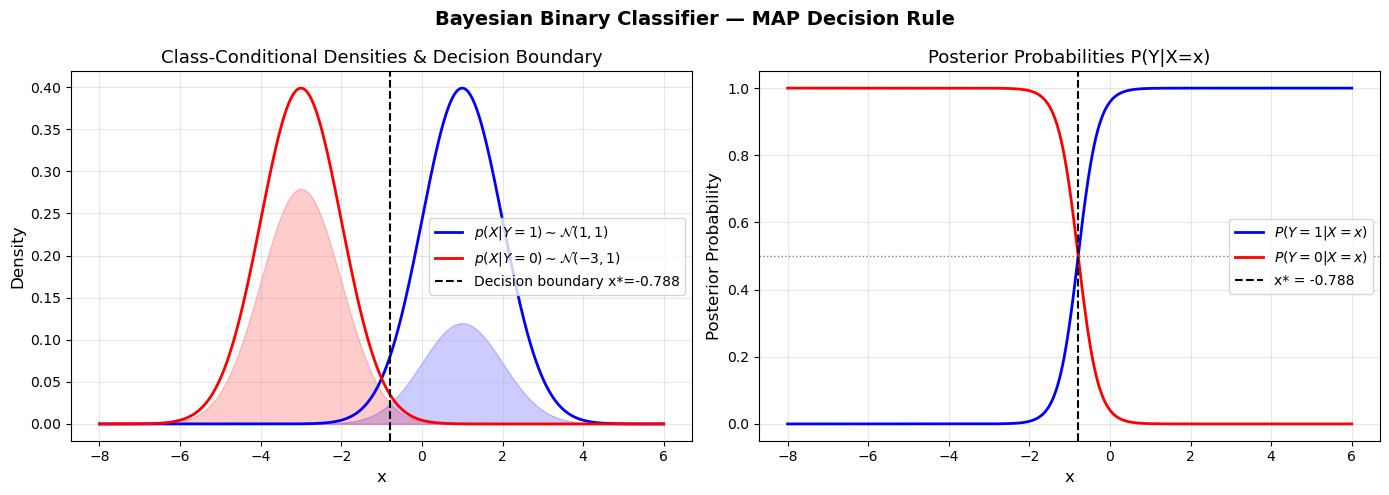

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(x_vals, gaussian_pdf(x_vals, mu_1, sigma_1), 'b-',  linewidth=2, label=r'$p(X|Y=1) \sim \mathcal{N}(1,1)$')
axes[0].plot(x_vals, gaussian_pdf(x_vals, mu_0, sigma_0), 'r-',  linewidth=2, label=r'$p(X|Y=0) \sim \mathcal{N}(-3,1)$')
axes[0].fill_between(x_vals, gaussian_pdf(x_vals, mu_1, sigma_1) * prior_1, alpha=0.2, color='blue')
axes[0].fill_between(x_vals, gaussian_pdf(x_vals, mu_0, sigma_0) * prior_0, alpha=0.2, color='red')
axes[0].axvline(x=x_star, color='black', linestyle='--', linewidth=1.5, label=f'Decision boundary x*={x_star:.3f}')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Class-Conditional Densities & Decision Boundary', fontsize=13)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].plot(x_vals, p1, 'b-', linewidth=2, label=r'$P(Y=1 | X=x)$')
axes[1].plot(x_vals, p0, 'r-', linewidth=2, label=r'$P(Y=0 | X=x)$')
axes[1].axvline(x=x_star, color='black', linestyle='--', linewidth=1.5, label=f'x* = {x_star:.3f}')
axes[1].axhline(y=0.5, color='gray', linestyle=':', linewidth=1)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Posterior Probability', fontsize=12)
axes[1].set_title('Posterior Probabilities P(Y|X=x)', fontsize=13)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Bayesian Binary Classifier — MAP Decision Rule', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('results/bayes_classifier.png', dpi=150, bbox_inches='tight')
plt.show()

## Bayes Error Rate

In [7]:
from scipy.integrate import quad

error_class1 = quad(lambda x: gaussian_pdf(x, mu_1, sigma_1) * prior_1, -np.inf, x_star)[0]
error_class0 = quad(lambda x: gaussian_pdf(x, mu_0, sigma_0) * prior_0, x_star, np.inf)[0]
bayes_error   = error_class1 + error_class0

print(f'P(error | Y=1) × P(Y=1) = {error_class1:.6f}')
print(f'P(error | Y=0) × P(Y=0) = {error_class0:.6f}')
print(f'Bayes Error Rate          = {bayes_error:.6f}  ({bayes_error*100:.3f}%)')
print(f'Bayes Accuracy            = {(1 - bayes_error)*100:.3f}%')
print()
print(f'Decision boundary x* = {x_star:.6f}  [= (log(7/3) - 4) / 4]')

P(error | Y=1) × P(Y=1) = 0.011062
P(error | Y=0) × P(Y=0) = 0.009443
Bayes Error Rate          = 0.020505  (2.050%)
Bayes Accuracy            = 97.950%

Decision boundary x* = -0.788176  [= (log(7/3) - 4) / 4]
